In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.7.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb



In [3]:
# Download and assign the data set using load_data()



#### Inspect the dataset

In [4]:
# Inspect the type of the data



In [5]:
# Inspect the shape of the data



In [6]:
# Display the first dataset element input
# Notice encoding



In [7]:
# Display the first dataset element output



#### Load dataset with different options

In [8]:
# Load the dataset with defaults


# ~/.keras/dataset/

In [9]:
# Limit the vocabulary to the top 500 words using num_words



In [10]:
# Ignore the top 10 most frequent words using skip_top



In [11]:
# Limit the sequence lengths to 500 using maxlen



In [12]:
 # Use '1' as the character that indicates the start of a sequence

 

#### Explore the dataset word index

In [13]:
# Load the imdb word index using get_word_index()



In [14]:
# View the word index as a dictionary,
# accounting for index_from.



In [15]:
# Retrieve a specific word's index



In [16]:
# View an input sentence



In [17]:
# Get the sentiment value



---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [18]:
# Load the imdb data set



#### Preprocess the data with padding

In [19]:
# Inspect the input data shape



In [20]:
# Pad the inputs to the maximum length using maxlen



In [21]:
# Inspect the output data shape



#### Create a Masking layer

In [22]:
# Import numpy 



In [23]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims



In [24]:
# Create a Masking layer 



In [25]:
# Pass tf_x_train to it



In [26]:
# Look at the dataset



In [27]:
# Look at the ._keras_mask for the dataset



***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [28]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [29]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequences_of_indices = tf.constant([[[0],[1],[5],[500]]]) #batch, sequence, fetures
sequence_of_embeddings = embedding_layer(sequences_of_indices)
print(sequences_of_indices)
sequence_of_embeddings


tf.Tensor(
[[[  0]
  [  1]
  [  5]
  [500]]], shape=(1, 4, 1), dtype=int32)


<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.0478437 , -0.01281571,  0.04484889,  0.01310679,
          -0.04727377,  0.04815084, -0.02093771, -0.04228704,
          -0.00982877,  0.00114368, -0.02973167, -0.04295925,
           0.04402964,  0.00515727, -0.04242837, -0.01756065]],

        [[ 0.0076698 , -0.01291524,  0.04035659,  0.04852368,
          -0.01335238,  0.01797446, -0.04131753, -0.01175756,
          -0.03504087, -0.0130484 , -0.04110258, -0.00462342,
          -0.04575888,  0.02765172, -0.02443266, -0.00975043]],

        [[-0.04306624,  0.04239169,  0.00144821,  0.04242368,
          -0.03844426,  0.01099951,  0.03812111,  0.02140501,
          -0.01067445,  0.006124  , -0.04057304,  0.03974206,
           0.04692806,  0.03512759, -0.03496275, -0.0045835 ]],

        [[ 0.00633528,  0.0236342 ,  0.02823757,  0.04645792,
          -0.01679832, -0.01930651,  0.03093212,  0.00485569,
          -0.0023918 ,  0.01629433, -0.02136358, -0.04365722,
      

In [30]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0][14]

array([-0.01105621, -0.0356944 , -0.01662564,  0.02982892, -0.00363884,
        0.00032741, -0.04316654, -0.01582193,  0.01032258, -0.0121852 ,
       -0.04444772,  0.0085387 ,  0.02703268,  0.00329692,  0.0233582 ,
        0.00461898], dtype=float32)

In [31]:
# Get the embedding for the 14th index

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)


#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [32]:
# Create a layer that uses the mask_zero kwarg
masked_sequence_of_embeddings= masking_embedding_layer(sequences_of_indices)
masked_sequence_of_embeddings._keras_mask


<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

In [33]:
# Apply this layer to the sequence and see the _keras_mask property



---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [35]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [36]:
# Load the dataset

(x_train,y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17473536/17464789 [==============================] - 0s 0us/step


In [37]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from} #only 9998 words are included rest of 88584 are excluded
    return imdb_word_index

In [38]:
# Get the word index

imdb_word_index = get_imdb_word_index()
len(imdb_word_index)
#imdb_word_index = tf.keras.datasets.imdb.get_word_index(
#                                        path='imdb_word_index.json')
len(imdb_word_index)

1654784/1641221 [==============================] - 0s 0us/step


9998

In [39]:
from tensorflow.keras.datasets import imdb
# Swap the keys and values of the word index

inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}
len(inv_imdb_word_index)

9998

In [40]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index>2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [41]:
# Get the maximum token value
max_index_value = max(imdb_word_index.values())
max_index_value

10000

In [42]:
# Specify an embedding dimension

embedding_dim=16

In [43]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=False),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(units=1, activation='sigmoid')

])

In [44]:
x_train[1000].shape

(2494,)

In [45]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None,))
embedding_sequence = tf.keras.layers.Embedding(input_dim= max_index_value+1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs = review_sequence, outputs = positive_probability)

In [46]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [47]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [48]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=12, validation_data=(x_test,y_test), validation_steps=20)

Epoch 1/5
2084/2084 [==============================] - 10s 4ms/step - loss: 0.6844 - accuracy: 0.5803 - val_loss: 0.6600 - val_accuracy: 0.7167
Epoch 2/5
2084/2084 [==============================] - 8s 4ms/step - loss: 0.6209 - accuracy: 0.7414 - val_loss: 0.5475 - val_accuracy: 0.8125
Epoch 3/5
2084/2084 [==============================] - 9s 4ms/step - loss: 0.5272 - accuracy: 0.8123 - val_loss: 0.4521 - val_accuracy: 0.8375
Epoch 4/5
2084/2084 [==============================] - 8s 4ms/step - loss: 0.4488 - accuracy: 0.8453 - val_loss: 0.3884 - val_accuracy: 0.8667
Epoch 5/5
2084/2084 [==============================] - 8s 4ms/step - loss: 0.3899 - accuracy: 0.8651 - val_loss: 0.3367 - val_accuracy: 0.8792


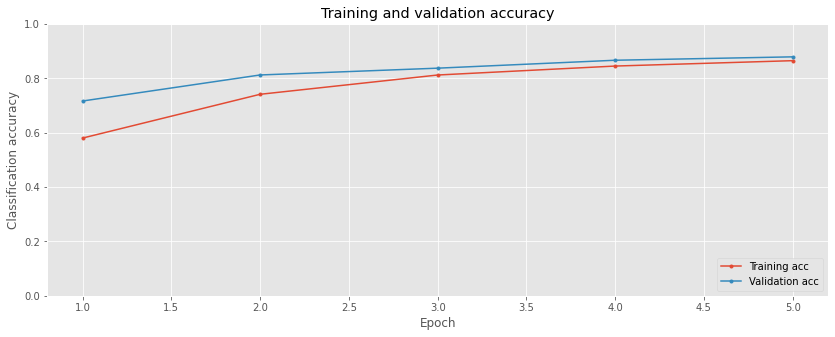

In [49]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [50]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]
model.layers
weights.shape

(10001, 16)

In [51]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join( 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join( 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [52]:
# Create a SimpleRNN layer and test it

#input to rnn =(batch, sequence, feature)

simplernnlayer = tf.keras.layers.SimpleRNN(units=16)


In [53]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1.,1.], [2.,2.], [56.,-100.] ]])
sequence.shape
layer_output = simplernnlayer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[ 1.        ,  1.        , -0.9343928 , -1.        ,  1.        ,
        -1.        ,  1.        , -1.        , -0.73990583,  1.        ,
         1.        , -1.        ,  1.        , -1.        ,  1.        ,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [54]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [55]:
# Load the dataset


(x_train,y_train), (x_test,y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [56]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [57]:
# Get the word index using get_imdb_word_index()
imdb_word_index=get_imdb_word_index()


#### Create a recurrent neural network model

In [58]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim=16

In [59]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.
model = tf.keras.Sequential([
                  tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                  tf.keras.layers.LSTM(units=16),
                  tf.keras.layers.Dense(units=1, activation='sigmoid')


])


#### Compile and fit the model

In [60]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          160016    
                                                                 
 lstm (LSTM)                 (None, 16)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 162,145
Trainable params: 162,145
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 295s 544ms/step - loss: 0.4467 - accuracy: 0.7956
Epoch 2/3
536/536 [==============================] - 288s 538ms/step - loss: 0.2320 - accuracy: 0.9129
Epoch 3/3
536/536 [==============================] - 288s 537ms/step - loss: 0.1605 - accuracy: 0.9449


#### Plot learning curves

In [62]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored

#### Make predictions with the model

In [72]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index >2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [71]:
# Get the model prediction using model.predict()
x_test[None,0,:].shape
type(x_test)
model.predict(x_test[None,0])


array([[0.23757982]], dtype=float32)

In [70]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [73]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [74]:
# Load the dataset

(x_train, y_train), (x_test,y_test) = get_and_pad_imdb_dataset(maxlen=250, num_words=5000)

In [75]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [76]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Build stacked and bidirectional recurrent models

In [78]:
# Get the maximum index value and specify an embedding dimension
max_index_value = max(imdb_word_index.values())
embedding_dim =16

In [80]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
          tf.keras.layers.Embedding(input_dim = max_index_value+1, output_dim =embedding_dim, mask_zero=True),
          tf.keras.layers.LSTM(units=32, return_sequences=True) ,
          tf.keras.layers.LSTM(units=32, return_sequences=False),
          tf.keras.layers.Dense(units=1, activation='sigmoid')


])

In [84]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'


model = tf.keras.Sequential([
                              tf.keras.layers.Embedding(input_dim = max_index_value+1, output_dim =embedding_dim, mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8), merge_mode='sum' ),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')


])

In [85]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
                              tf.keras.layers.Embedding(input_dim = max_index_value+1, output_dim =embedding_dim, mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat' ),
                                tf.keras.layers.GRU(units=8), 
                             tf.keras.layers.Dense(units=1, activation='sigmoid')


])

#### Compile and fit the model

In [86]:
# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')



In [87]:
# Train the model, saving its history

history = model.fit(x_train,y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 [==============================] - 875s 2s/step - loss: 0.4295 - accuracy: 0.7869
Epoch 2/3
536/536 [==============================] - 858s 2s/step - loss: 0.2489 - accuracy: 0.9071
Epoch 3/3
536/536 [==============================] - 855s 2s/step - loss: 0.1908 - accuracy: 0.9319


In [88]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored